<h1 style="color:green; margin-bottom:15px;font-size:25px">Machine Learning Models - Gym Customers Churn Prediction</h1>

# Project Description

Fitness centers network develops a strategy for interacting with clients.

For a fitness center, a client can be considered churned if he/she has never visited the gym in the last month.
To combat churn, customer service department has digitized customer profiles. Your task is to analyze and prepare an action plan to increase customer retention.

- build a model predicting the probability of churn (at the level of the next month) for each client;
- describe typical clients;
- analyze the features that have the most affect on churn rate;
- formulate conclusions and give recommendations to increase customer retention.

# Contents

<ol>
<li>Libraries Import</li> 
<li>Data Import</li>
<li>Data Description</li>
<li>Data Analysis</li>
<li>Churn Prediction Model</li>
<li>Customers Clusterization</li>
<li>Conclusion and Recomendations</li>  
</ol>

## 1. Libraries Import

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import math as mth
from scipy import stats as st
import statistics
from statistics import mean

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

## 2. Data Import

In [2]:
data=pd.read_csv('gym_churn.csv', sep=',')
data.columns = data.columns.str.lower()
display(data)
display(data.info())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

None

## 3. Data Description

The data set has 4000 rows and 14 columns and no gaps.


**Continuous variables**
- age;
- lifetime — number of months passed since the first visit;
- month_to_end_contract — number of months until the end of the contract;
- avg_additional_charges_total - total revenue from other services: cafe, sports goods, spa;
- avg_class_frequency_total - the average frequency of visits per week for the entire time since the first visit;
- avg_class_frequency_current_month — average frequency of visits per week for the previous month;

**Binary variables**
- churn — churn fact in the current month - **target variable**
- gender;
- near_location - the fact of living or working nearby;
- partner — an employee of the partner company;
- promo_friends - used a promo code from a friend when paying for the first subscription;
- phone — presence of a contact phone number;
- group_visits — the fact of attending group classes;

**Categorical variables**
- contract_period — month, 3 months, 6 months, year;

## 4.Data Analysis

In [3]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
left = data[data['churn'] == 1]
left.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


In [5]:
stayed = data[data['churn'] == 0]
stayed.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


*Conclusion:* The dataset contains 4000 clients, 1061 of them (about a quarter) churned.

The dataset does not contain gaps. Judging by the means and standard deviations, customers who stay, on average:

- go to the gym more often
- more likely to live or work near the gym
- are more often employed by a club partner company
- often come through friends and acquaintances
- choose longer contracts
- attend group classes more often
- leave a lot more money in the club (cafe, sports goods, cosmetic and massage salon)
- a few years older (26-33 years old, while churned clients are 24-30 years old)

The presence of a phone number and gender most likely does not affect the fact of churn.

For convenience, we will further refer to the customers retained as loyal customers.

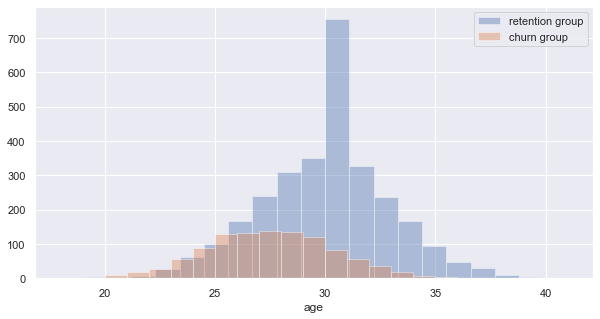

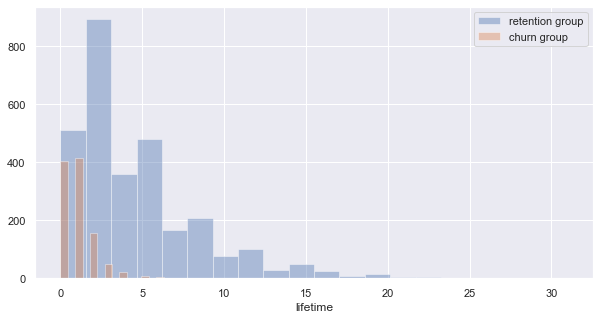

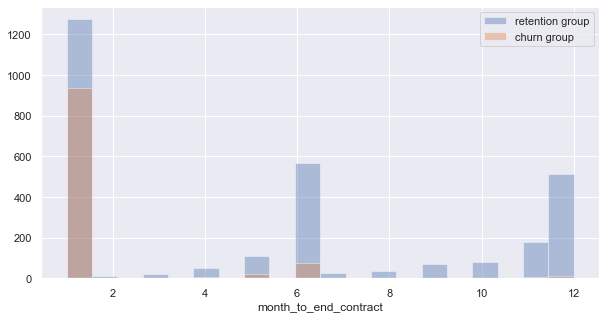

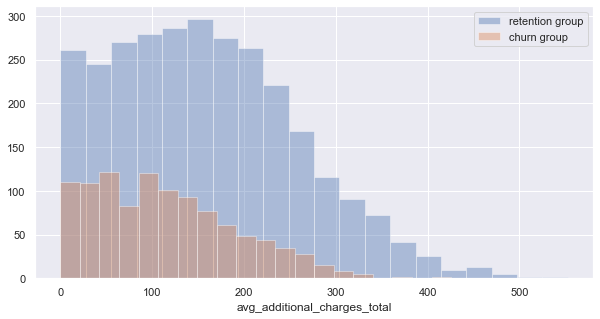

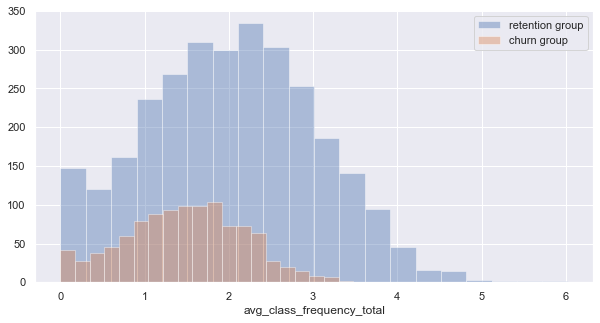

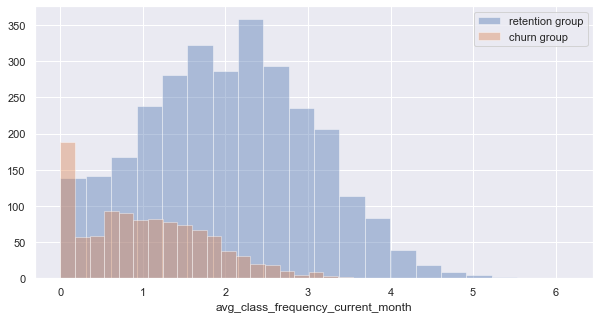

In [6]:
#let's build joint histograms of features distributions (churn/non-churn)
sns.set(style="white", palette="tab10", color_codes=True)
sns.set(rc={'figure.figsize':(10,5)})

for col in ['age','lifetime','month_to_end_contract','avg_additional_charges_total','avg_class_frequency_total','avg_class_frequency_current_month']:
    sns.distplot(stayed[col], kde=False, bins=20)
    sns.distplot(left[col], kde=False, bins=20)
    plt.legend(labels=["retention group", "churn group"]) 
    plt.show()

*Conclusion:*
- Age: Most loyal customers are 30 years old (20-40). Churned clients - 24-29 years old.
- Additional spending and average attendance have approximately the same distributions in both groups.
- Loyal customers choose all kinds of contracts (1, 6 and 12 months), while churned ones tend to take short ones (1 month only).

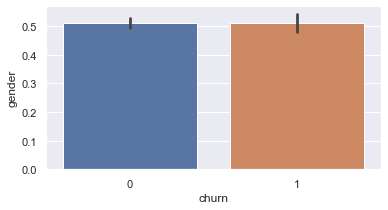

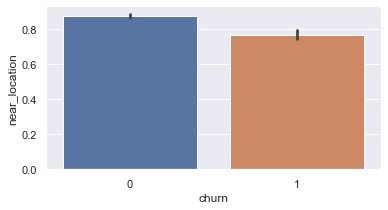

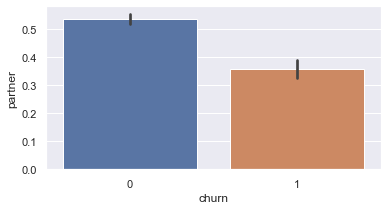

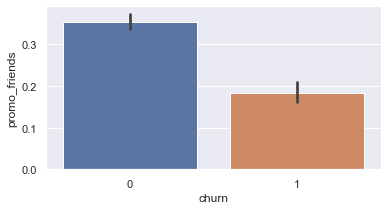

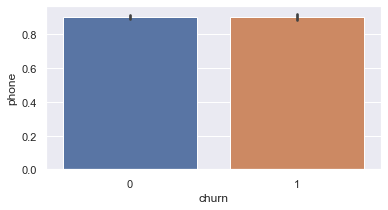

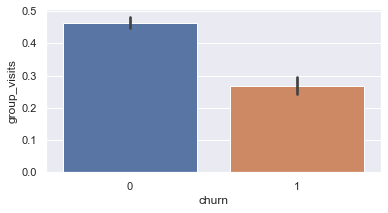

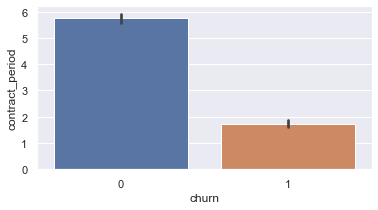

In [7]:
#let's build joint bar charts of binary features (churn/non-churn)
sns.set(rc={'figure.figsize':(6,3)})
for col in ['gender','near_location','partner','promo_friends','phone','group_visits', 'contract_period']:
    sns.barplot(x='churn', y=col, data=data, estimator = np.mean) 
    plt.show()

*Conclusion:* Loyal customers on average:
- are more likely to live or work near the gym (90% of loyal customers versus 70% in the churn group)
- are more likely to work for a one of the club's partner companies (55% vs. 35%)
- more often come through friends and acquaintances (35% of loyal customers versus 18% in the churn group)
- choose longer contracts (5.5 months in the group of loyal customers versus 1.5 months in the churn group)
- attend group classes more often (45% in the group of loyal customers versus 27% in the churn group)

The presence of a phone number and gender most likely does not affect the churn.

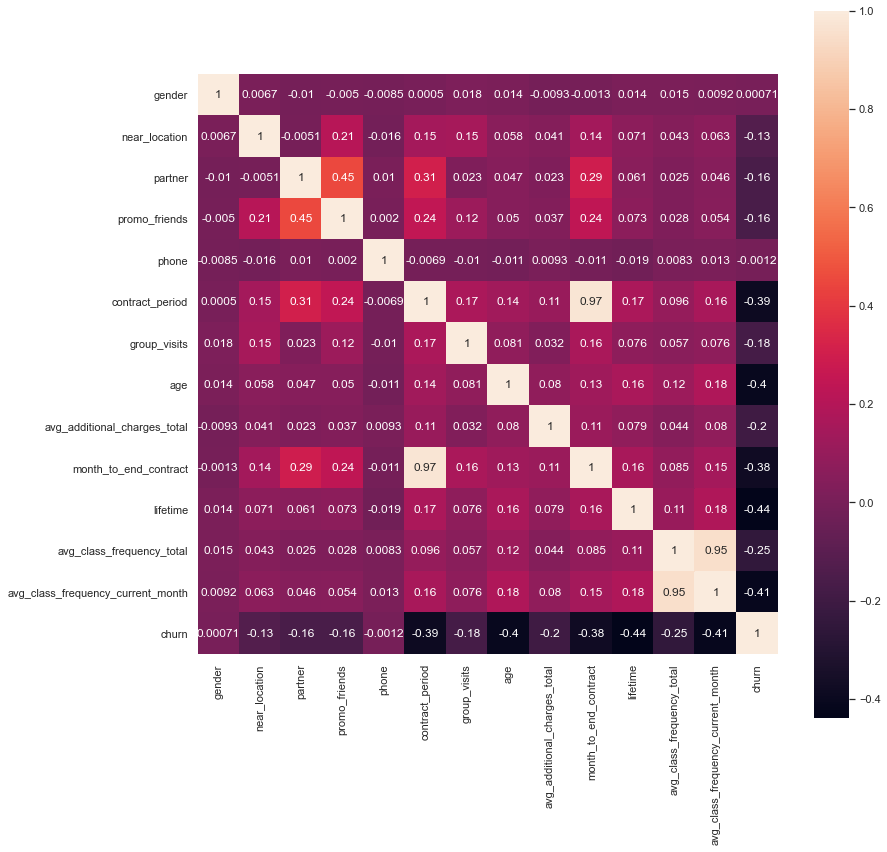

In [8]:
#let's build the correlation matrix
cm = data.corr() 
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(cm, annot = True, square=True)
plt.show()

*Conclusion:* Judging by the correlation matrix, the following parameters depend on each other and can affect the quality of linear models:
- contact_period and month_to_end_contract
- avg_class_frequency_current_month and avg_class_frequency_total

Let's remove the month_to_end_contract and avg_class_frequency_total variables.

In [9]:
data.drop('month_to_end_contract', inplace=True, axis=1)
data.drop('avg_class_frequency_total', inplace=True, axis=1)

## 5. Churn Prediction Model

Let's build a binary classification model of customers, where the target vsriable is the fact of churn in the next month:

- Split the data into training and validation samples using the train_test_split() function.
- Train the model on the train sample in two ways: logistic regression, random forest.
- Evaluate the accuracy, precision, and recall metrics for both models on the validation set.
- Compare models on them. Which model performed better based on the metrics?
- Don't forget to specify the random_state parameter when splitting the sample and specifying the algorithm.

In [10]:
#splitting the data into features (matrix X) and target variable (y)
X = data.drop('churn', axis = 1)
y = data['churn']

#defining the metrics 
def print_all_metrics(y_true, y_pred, y_proba, title='Model Metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

#splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

#training StandardScaler on a training set
scaler = StandardScaler()
scaler.fit(X_train)

#transforming the training and validation Datasets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#logistic regression model
lr_model = LogisticRegression(random_state=0)
#training the model
lr_model.fit(X_train_st, y_train)
#building predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
#printing the metrics
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='logistic regression model metrics:',
)

#random forest
rf_model = RandomForestClassifier(n_estimators = 100,random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='random forest model metrics:'
)

logistic regression model metrics:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.82
random forest model metrics:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.75


*Notes:*


Accuracy tells us how many times the ML model was correct overall.
- Accuracy = (TP + TN) / n

Precision is how good the model is at predicting the positive answers.
Precision is a good measure to determine, when the costs of False Positive is high.
- Precision = TP / (TP + FP)

Recall calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.
- Recall = TP / (TP + FN)

where:

- TP - true positive responses
- TN - true negative responses
- FP - false positive responses
- FN - false negative responses
- n - all answers

*Conclusion:* The best model of the two is logistic regression, with equal Accuracy scores, its Precision and Recall scores are higher.

In [11]:
#let's print out the coefficients of all features
features = pd.DataFrame({'feature': X.columns, 'coeff': lr_model.coef_[0]})
features['coeff_abs']=features['coeff'].abs()
print(features.sort_values(by='coeff_abs', ascending=False))

                              feature     coeff  coeff_abs
9                            lifetime -3.922703   3.922703
5                     contract_period -1.340862   1.340862
10  avg_class_frequency_current_month -1.326734   1.326734
7                                 age -1.102478   1.102478
8        avg_additional_charges_total -0.582020   0.582020
6                        group_visits -0.378909   0.378909
3                       promo_friends -0.244437   0.244437
4                               phone -0.088119   0.088119
1                       near_location -0.083076   0.083076
2                             partner -0.069225   0.069225
0                              gender  0.050670   0.050670


*Conclusion:* Lifetime, attendance, contract period and age affect churn the most.

The longer the client has been with the club, the higher his average attendance for the last month and the higher the age, the lower the churn.

Churn is also affected by group activities and the presence of friends training at the club. Clients who attend group classes are less likely to leave, as well as clients who are brought to the club by relatives, friends and acquaintances.

Gender, the presence of a telephone almost do not affect the churn (as we suggested above), as well as the distance from the club and affiliate programs.

## 6. Customers Clusterization

Set aside the churn column and cluster the customers:

- Standardize your data.

- Build a distance matrix with the linkage() function on a standardized feature matrix and draw a dendrogram. 

- Train a clustering model based on the K-Means algorithm and predict customer clusters.

- Plot feature distributions for the clusters.

- For each resulting cluster, calculate the churn rate.

In [12]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

In [ ]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

The dendogram shows us that we need to build 4 clusters.

In [13]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(x_sc)

data['labels'] = labels

In [14]:
print('Group 0')
group0 = data[data['labels'] == 0]
group0.describe()

Group 0


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn,labels
count,386.000000,386.000000,386.000000,386.000000,386.0,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.0
mean,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839,0.0
std,0.500104,0.344616,0.499835,0.461301,0.0,4.535814,0.495352,3.160938,94.124743,4.052778,1.022920,0.442882,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,20.000000,1.767654,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,27.000000,71.090935,1.000000,1.023523,0.000000,0.0
50%,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,29.000000,137.016545,3.000000,1.657683,0.000000,0.0
75%,1.000000,1.000000,1.000000,1.000000,0.0,6.000000,1.000000,31.000000,204.014435,5.000000,2.390229,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0,12.000000,1.000000,38.000000,496.172222,26.000000,4.729706,1.000000,0.0


**Group 0** contains 386 clients. These clients:
- in 86% of cases live or work near the club
- in 47% of cases work in partner organizations
- in 30% of cases came through friends
- never leave their phone number in the system
- in 43% of cases go to group classes
- 26-32 years old
- left in the club an average of 144 rubles for additional services for the entire time
- choose longer contracts (4.8 months on average)
- visit the gym 1.72 times a week 
- have an average churn rate of 27%

In [15]:
print('Group 1')
group1 = data[data['labels'] == 1]
group1.describe()

Group 1


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn,labels
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.0,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.0
mean,0.495448,0.670713,0.296662,0.044006,1.0,1.946131,0.207891,27.554628,118.680416,1.916540,1.212660,0.593323,1.0
std,0.500169,0.470133,0.456959,0.205186,0.0,2.385920,0.405952,3.002602,82.341604,2.103405,0.857046,0.491400,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,18.000000,0.171862,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,25.000000,51.197139,1.000000,0.559601,0.000000,1.0
50%,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,28.000000,107.302082,1.000000,1.140953,1.000000,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,30.000000,170.045092,3.000000,1.767615,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.0,12.000000,1.000000,37.000000,468.205360,16.000000,4.447590,1.000000,1.0


**Group 1** contains 1318 clients. These clients:

- in 67% of cases live or work near the club
- in 30% of cases work in partner organizations
- don't come through friends
- always leave their phone number in the system
- in 20% of cases go to group classes
- 24-31 years old
- left in the club an average of 118 rubles for additional services for the entire time
- choose short contracts (1.9 months on average)
- visit the gym 1.2 times a week 
- have an average churn rate of 59%

In [16]:
print('Group 2')
group2 = data[data['labels'] == 2]
group2.describe()

Group 2


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn,labels
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.0,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.0
mean,0.526951,0.921963,0.370072,0.004023,1.0,5.893805,0.535800,30.572003,173.536262,5.133548,2.253940,0.032180,2.0
std,0.499474,0.268338,0.483018,0.063321,0.0,4.739934,0.498917,2.937391,102.483843,4.236547,0.986510,0.176549,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,21.000000,0.510545,0.000000,0.000000,0.000000,2.0
25%,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,29.000000,93.239970,2.000000,1.540254,0.000000,2.0
50%,1.000000,1.000000,0.000000,0.000000,1.0,6.000000,1.000000,31.000000,165.344328,4.000000,2.322307,0.000000,2.0
75%,1.000000,1.000000,1.000000,0.000000,1.0,12.000000,1.000000,33.000000,241.939999,7.000000,2.936291,0.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.0,12.000000,1.000000,41.000000,552.590740,31.000000,5.458295,1.000000,2.0


**Group 2** contains 1243 loyal clients. These clients:

- in 92% of cases live or work near the club
- in 37% of cases work in partner organizations
- don't come through friends
- always leave their phone number in the system
- in 53% of cases go to group classes
- 28-33 years old
- left in the club an average of 173 rubles for additional services for the entire time
- choose long contracts (5.89 months on average)
- visit the gym 2.25 times a week 
- don't leave the club

In [17]:
print('Group 3')
group3 = data[data['labels'] == 3]
group3.describe()

Group 3


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn,labels
count,1053.000000,1053.000000,1053.000000,1053.0,1053.0,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.0
mean,0.504274,0.966762,0.867996,1.0,1.0,6.638177,0.516619,29.544160,151.931807,4.245964,1.902015,0.129155,3.0
std,0.500219,0.179344,0.338656,0.0,0.0,4.749739,0.499961,3.080849,96.430625,3.736992,1.038582,0.335531,0.0
min,0.000000,0.000000,0.000000,1.0,1.0,1.000000,0.000000,20.000000,0.148205,0.000000,0.000000,0.000000,3.0
25%,0.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,27.000000,71.772789,1.000000,1.113919,0.000000,3.0
50%,1.000000,1.000000,1.000000,1.0,1.0,6.000000,1.000000,30.000000,146.288462,3.000000,1.884468,0.000000,3.0
75%,1.000000,1.000000,1.000000,1.0,1.0,12.000000,1.000000,32.000000,219.626145,6.000000,2.632663,0.000000,3.0
max,1.000000,1.000000,1.000000,1.0,1.0,12.000000,1.000000,38.000000,460.904008,24.000000,6.146783,1.000000,3.0


*Conclusion:* Group 3 contains 1053 clients. These clients:
- in 96% of cases live or work near the club
- in 87% of cases work in partner organizations
- in 100% of cases came through friends
- always leave their phone number in the system
- in 51% of cases they go to group classes
- 26-33 years old
- left in the club an average of 151 rubles for additional services for the entire time
- choose long-term contracts (6.6 months on average)
- visit the gym 2 times a week
- have an average churn rate of 13%

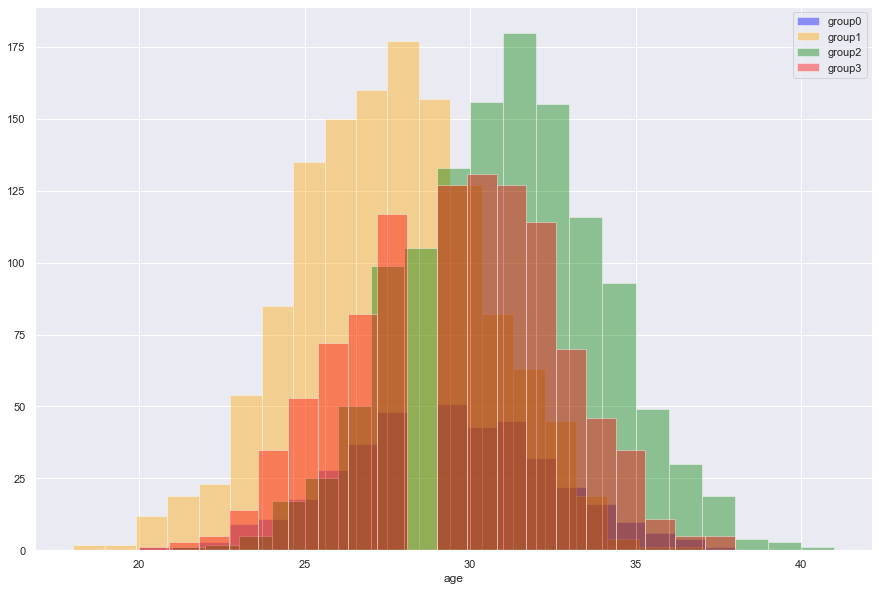

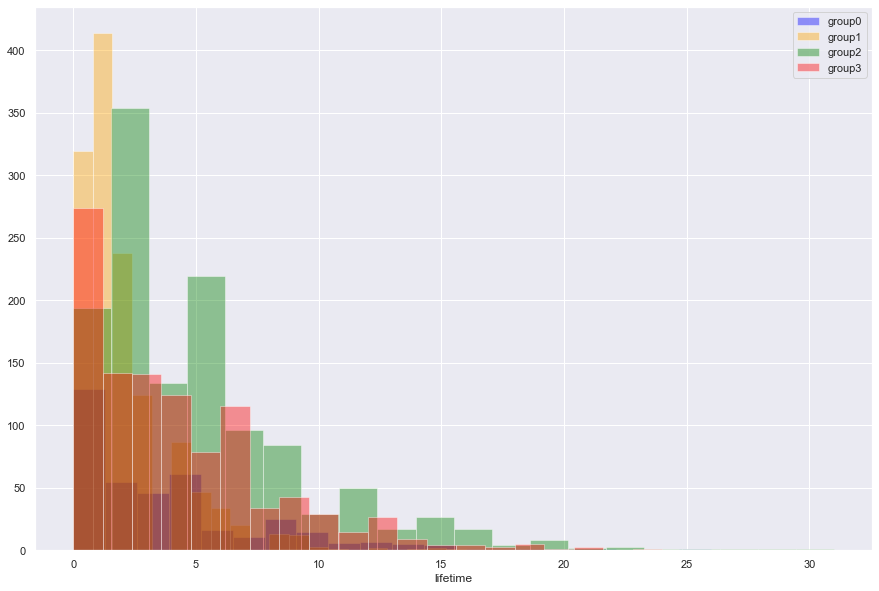

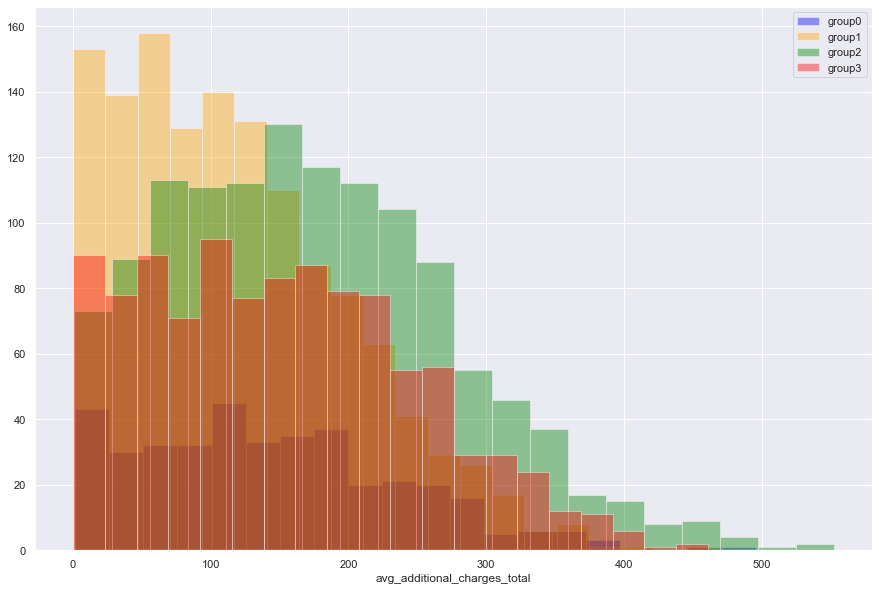

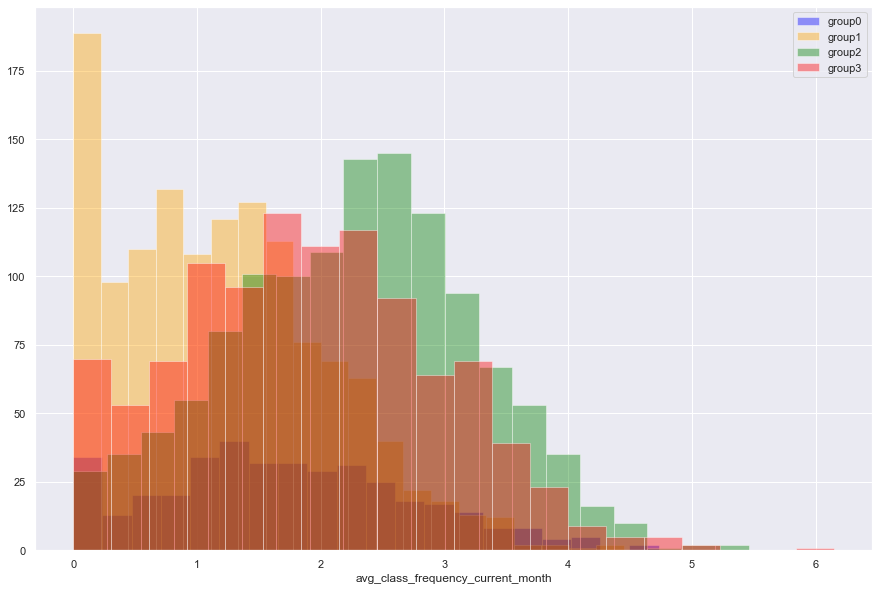

In [22]:
#let's build joint histograms of features distributions (churn/non-churn)
sns.set(style="white", palette="tab10", color_codes=True)
sns.set(rc={'figure.figsize':(15,10)})

for col in ['age','lifetime','avg_additional_charges_total','avg_class_frequency_current_month']:
    sns.distplot(group0[col], kde=False, color='blue', bins=20)
    sns.distplot(group1[col], kde=False, color='orange', bins=20)
    sns.distplot(group2[col], kde=False, color='green', bins=20)
    sns.distplot(group3[col], kde=False, color='red', bins=20)
    plt.legend(labels=["group0","group1","group2","group3"])
    plt.show()

- 3rd group customers are much younger than the others
- Clients of the 2nd group pay more for additional services than others
- Clients of groups 2 and 3 visit the gym most often

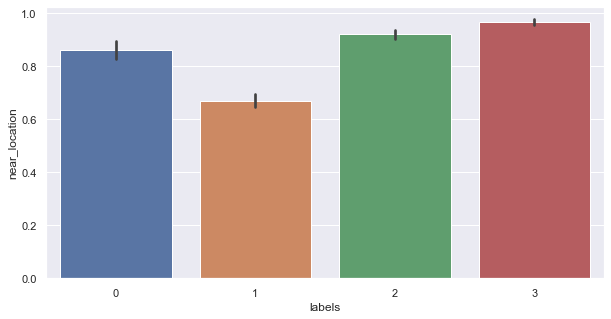

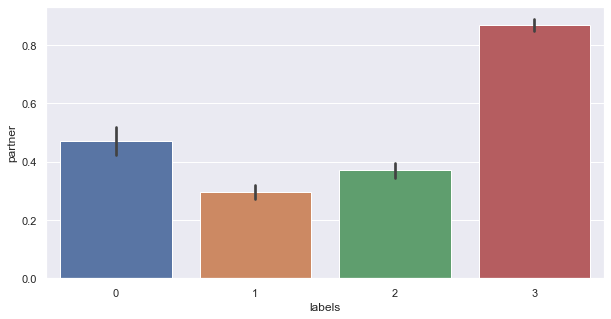

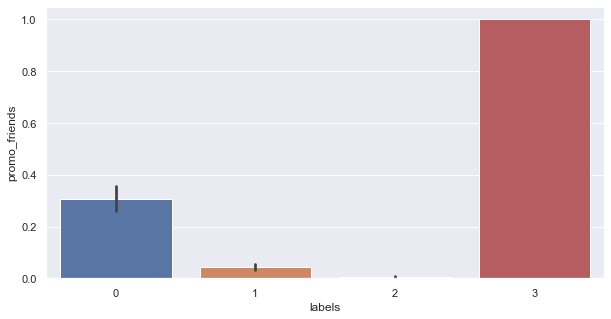

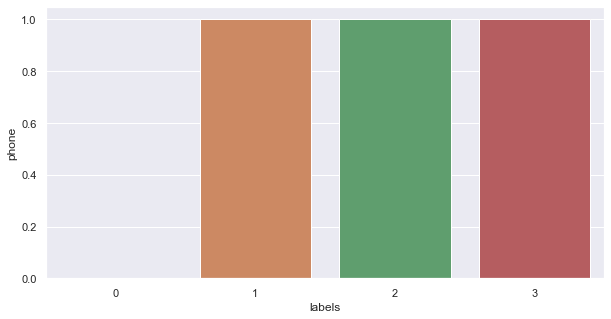

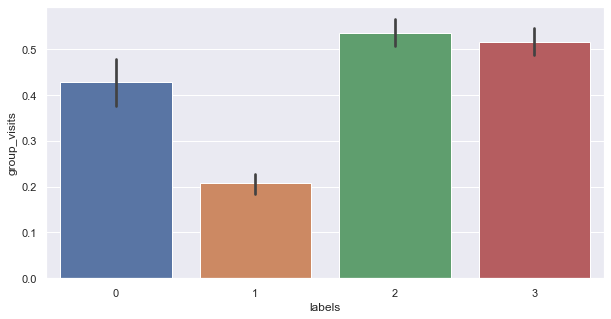

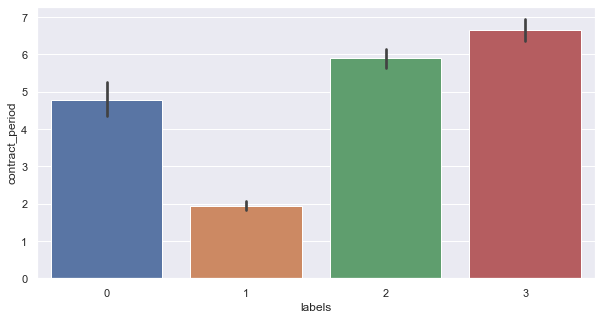

In [23]:
#let's build joint bar charts of binary features (churn/non-churn)
sns.set(rc={'figure.figsize':(10,5)})

for col in ['near_location','partner','promo_friends','phone','group_visits', 'contract_period']:
    sns.barplot(x='labels', y=col, data=data, estimator = np.mean) 
    plt.show()   

- Group 1 customers tend to sign much shorter contracts and don't go to group trainings, they never leave their phone numbers and less likely to live or work nearby or to work for a partner company.
- Group 0 customers sign long contracts, never leave their phone number, don't come through friends, are likely to live or work nearby.
- Group 2 customers sign long contracts, always leave their phone number, don't come through friends, are likely to live or work nearby.
- Group 3 customers always leave their phone number, and almost always come through friends or work, leave or work nearby, have long contracts and visit the group trainings in 50% of cases.

In [ ]:
print(data.groupby('labels')['churn'].mean())

The most loayl ones are the customers from Group 2. They always leave their phone numbers, live or work nearby, don't come through friends, take longer contracts and in 50% of cases visit group trainings. 

## 6. Conclusion and Recomendations

Lifetime, attendance, contract period and age affect churn the most.

The longer the client has been with the club, the higher his average attendance for the last month and the higher the age, the lower the churn.

Churn is also affected by group activities and the presence of friends training at the club. Clients who attend group classes are less likely to leave, as well as clients who are brought to the club by relatives, friends and acquaintances.

Gender, the presence of a telephone almost do not affect the churn (as we suggested above), as well as the distance from the club and affiliate programs.

I would focus on the following to increase customer retention:
- introduce a promotion for unlimited annual subscriptions (annual subscriptions should be much more attractive than subscriptions for 1 and 6 months);
- send automatic reminders to those who visit rarely (or stopped visiting) the gym in the last month, offer the option of free membership freeze if necessary
- collect feedback from regular customers and work on maintain the level of service (clients who have been visiting the club for a long time are less likely to leave the club)
- expand the network of group classes (clients who attend group classes leave less often)
- introduce a 'refer a friend' promotion with discounts for both the referred friend and the 'old' client (for example, add 1-2 free additional months to the annual subscription for both)